# Sublimation Equilibrium (Einstein solid + ideal-gas vapor)

This notebook accompanies the CHE 610 problem:

A rigid, diathermal vessel (fixed $V$, fixed $T$) initially contains an Einstein solid with $N_S^\circ$ molecules. A fraction $\varepsilon\in[0,1]$ sublimates to an ideal-gas vapor with $N_V=\varepsilon N_S^\circ$ and $N_S=(1-\varepsilon)N_S^\circ$.

Helmholtz energies from statistical mechanics:
$$A_V=-kTN_V\Big(\ln\tfrac{q_V}{N_V}+1\Big),\qquad A_S=-kTN_S\ln q_S,$$
with single-molecule partition functions $q_V=q_V(T,V)$ and $q_S=q_S(T)$.

We define $\Delta A = A(\varepsilon)-A(0)$, so $A(0)=-kTN_S^\circ\ln q_S$.

## Result (derivation)
Using $N_V=\varepsilon N_S^\circ$ and $N_S=(1-\varepsilon)N_S^\circ$,
$$\frac{\Delta A}{kT}= -\varepsilon N_S^\circ\Big(\ln\tfrac{q_V}{\varepsilon N_S^\circ}+1\Big)+\varepsilon N_S^\circ\ln q_S 
=\; \varepsilon N_S^\circ\Big[\ln\Big(\tfrac{\varepsilon N_S^\circ q_S}{q_V}\Big)-1\Big].$$

Equilibrium at fixed $(T,V,N_S^\circ)$ minimizes $A$, so
$$\frac{\mathrm{d}}{\mathrm{d}\varepsilon}\Big(\frac{\Delta A}{kT}\Big)=\ln\big(C\,\varepsilon\big)=0,\qquad C\equiv\frac{N_S^\circ q_S}{q_V}.$$
Hence the stationary point is
$$\boxed{\;\varepsilon^*=\frac{q_V}{N_S^\circ q_S}\;}.$$
Since $\frac{\mathrm{d}^2}{\mathrm{d}\varepsilon^2}(\Delta A/kT)=1/\varepsilon>0$, this is a minimum **if** $0<\varepsilon^*\le 1$. If $\varepsilon^*>1$, the constrained minimum on $[0,1]$ occurs at the boundary $\varepsilon=1$ (all solid sublimes). If $\varepsilon^*\le 0$ (unphysical for positive $q_V,q_S,N_S^\circ$), the minimum would be at $\varepsilon=0$.

Below we explore these regimes numerically and plot $\Delta A/kT$ vs $\varepsilon$ for various $N_S^\circ$.


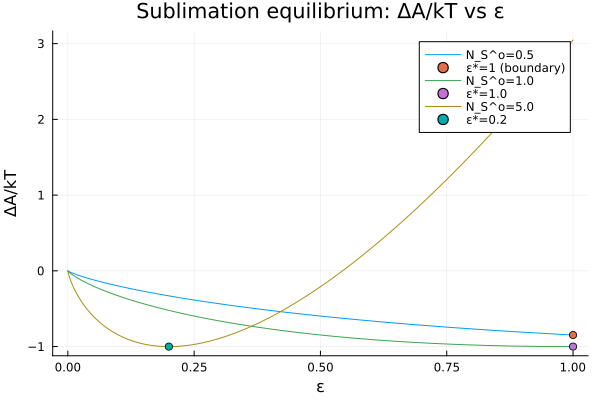

Saved figure: sublimation_deltaA_vs_eps.png


In [7]:
# Julia environment
# You may need: using Pkg; Pkg.add(["Plots"])  # and optionally DataFrames
using Plots, Printf

# ----- Parameters -----
kB = 1.380649e-23           # J/K (unused in ΔA/kT, but kept for reference)
T = 300.0                   # K (fixed)
V = 1.0                     # m^3 (fixed)

# Single-molecule partition functions (choose any positive values)
qv = 2                  # q_V(T,V)
qs = 2                  # q_S(T)

# Explore several initial solid counts N_S^o (dimensionless: molecules)
NS0_list = [.5, 1, 5]

# ----- ΔA/kT function -----
deltaA_by_kT(eps, NS0, qv, qs) = eps*NS0*(log(eps*NS0*qs/qv) - 1)

# ----- Plot ΔA/kT vs ε for several N_S^o -----
eps = range(1e-6, 1, length=600)
plt = plot(xlabel="ε", ylabel="ΔA/kT", title="Sublimation equilibrium: ΔA/kT vs ε", legend=:topright)
for NS0 in NS0_list
    y = [deltaA_by_kT(e, NS0, qv, qs) for e in eps]
    plot!(plt, eps, y, label="N_S^o=$(NS0)")
    # equilibrium candidate
    e_star = qv/(NS0*qs)
    if 0.0 < e_star <= 1.0
        scatter!(plt, [e_star], [deltaA_by_kT(e_star, NS0, qv, qs)], label="ε*=$(round(e_star; sigdigits=3))")
    else
        # boundary minimum at ε=1
        scatter!(plt, [1.0], [deltaA_by_kT(1.0, NS0, qv, qs)], label="ε*=1 (boundary)")
    end
end
display(plt)
savefig(plt, "sublimation_deltaA_vs_eps.png")
println("Saved figure: sublimation_deltaA_vs_eps.png")


In [8]:
# Compute and print a summary table of equilibrium quantities
function equilibrium_summary(NS0_list; qv=1.0e5, qs=1.0e2, T=300.0, V=1.0)
    println(rpad("N_S^o",12), rpad("ε*",12), rpad("N_V*",12), rpad("N_S*",12), rpad("P* (Pa)",14))
    for NS0 in NS0_list
        e_star = qv/(NS0*qs)
        if e_star > 1.0
            e_star = 1.0  # constrained minimum at boundary
        end
        NV = e_star*NS0
        NS = (1 - e_star)*NS0
        Pstar = NV * (1.380649e-23*T)/V  # ideal gas
        println(rpad(string(NS0),12), rpad(@sprintf("%.5g", e_star),12), rpad(@sprintf("%.5g", NV),12), rpad(@sprintf("%.5g", NS),12), rpad(@sprintf("%.5g", Pstar),14))
    end
end
equilibrium_summary(NS0_list; qv=qv, qs=qs, T=T, V=V)


N_S^o       ε*          N_V*        N_S*        P* (Pa)       
0.5         1           0.5         0           2.071e-21     
1.0         1           1           0           4.1419e-21    
5.0         0.2         1           4           4.1419e-21    


## How to use
1. Adjust `qv`, `qs`, `T`, `V`, and `NS0_list` as needed.
2. Re-run the plotting cell to visualize $\Delta A/kT$ vs $\varepsilon$ for different $N_S^\circ$.
3. Run the summary cell to get equilibrium $\varepsilon^*$, $N_V^*$, $N_S^*$, and $P^*$ for each case.

### Interpretation
- Interior minimum: if $\varepsilon^*=q_V/(N_S^\circ q_S)\le 1$, partial sublimation with both phases present.
- Boundary minimum: if $\varepsilon^*>1$, the minimum occurs at $\varepsilon=1$ (all solid sublimes).